# From Pre-trained Word Embeddings TO Pre-trained Language Models - Focus on Transformers and BERT
### based on https://towardsdatascience.com/from-pre-trained-word-embeddings-to-pre-trained-language-models-focus-on-bert-343815627598
### The Illustrated Transformers (https://jalammar.github.io/illustrated-transformer/)

![](https://miro.medium.com/max/3900/1*ff_bprXLuTueAx7-5-MHew.png)


## Static Word Embedding
- Skip-Gram & CBOW (aka Word2Vec)
- Glove
- fastText
- Exotic: Lda2Vec, Node2Vec, Characters Embeddings, CNN embeddings, …
- Poincaré Embeddings to learn hierarchical representation

## Contextualized (Dynamic) Word Embedding (LM)
- CoVe (Contextualized Word-Embeddings)
- CVT (Cross-View Training)
- ELMO (Embeddings from Language Models)
- ULMFiT (Universal Language Model Fine-tuning)
- BERT (Bidirectional Encoder Representations from Transformers)
- GPT & GPT-2 (Generative Pre-Training)
- Transformer XL (meaning extra long)
- XLNet (Generalized Autoregressive Pre-training)
- ENRIE (Enhanced Representation through kNowledge IntEgration)
- (FlairEmbeddings (Contextual String Embeddings for Sequence Labelling))

# What is a good model?
Best models would be able to capture 4 components:

- Lexical approach (relating to the words or vocabulary of a language)
- Syntactic approach (the arrangement of words and phrases to create well-formed sentences in a language -> grammar)
- Semantic approach (relating to meaning in language -> stretch the words beyond, understanding ambiguities)
- Pragmatic approach (relating proximity between words and documents)

# What are the main families of models?

![](https://miro.medium.com/max/2988/1*X1JSg2zYqD94Mp-MJRBsAw.png)


Language modeling is the task of assigning a probability distribution over sequences of words that matches the distribution of a language. Although it sounds formidable, language modeling (i.e. ELMo, BERT, GPT) is essentially just predicting words in a blank. More formally, given a context, a language model predicts the probability of a word occurring in that context.

Why is this method effective? Because this method forces the model to learn how to use information from the entire sentence in deducing what words are missing.

# 0. Static vs. Dynamic

- Static Word Embeddings fail to capture polysemy. They generate the same embedding for the same word in different contexts. 
- Contextualized words embeddings aim at capturing word semantics in different contexts to address the issue of polysemous and the context-dependent nature of words.
- Static Word Embeddings could only leverage off the vector outputs from unsupervised models for downstream tasks — not the unsupervised models themselves.They were mostly shallow models to begin with and were often discarded after training (e.g. word2vec, Glove) 
- The output of Contextualized (Dynamic) Word Embedding training is the trained model and vectors — not just vectors.
- Traditional word vectors are shallow representations (a single layer of weights, known as embeddings). They only incorporate previous knowledge in the first layer of the model. The rest of the network still needs to be trained from scratch for a new target task. They fail to capture higher-level information that might be even more useful. Word embeddings are useful in only capturing semantic meanings of words but we also need to understand higher level concepts like anaphora, long-term dependencies, agreement, negation, and many more.

## Evolutions
![](https://miro.medium.com/max/3212/1*zCoB9_l5NXzlggQikrdxYg.png)
![](https://miro.medium.com/max/4000/0*Sl8byJU_nDdyTdMK.png)

**Transfer learning** — a technique where instead of training a model from scratch, we use **models pre-trained on a large dataset** and **then fine-tune them for specific natural language tasks.**

Some particularities :
- ULMFiT → Transfer by Fine Tuning
- ELMo → Transfer by Features Extraction
- BERT → Transfer by Attention Extraction

## Why using Transfer Learning?

*In vision, it has been in practice for some time now, with people using models trained to learn features from the huge ImageNet dataset, and then training it further on smaller data for different tasks.*

- Most datasets for text classification (or any other supervised NLP tasks) are rather small. This makes it very difficult to train deep neural networks, as they would tend to overfit on these small training data and not generalize well in practice.

*In computer vision, for a couple of years now, the trend is to pre-train any model on the huge ImageNet corpus. This is much better than a random initialization because the model learns general image features and that learning can then be used in any vision task (say captioning, or detection).*

In NLP, we trained on a general language modeling (LM) task and then fine tuned on text classification (or other task). This would, in principle, perform well because the model would be able to use its knowledge of the semantics of language acquired from the generative pre-training.

- it is able to capture long-term dependencies in language
- it effectively incorporates hierarchical relations
- it can help the model learn sentiments
- large data corpus is easily available for LM

## The Transformer

A model that uses attention to boost the speed with which these models can be trained. The Transformers outperforms the Google Neural Machine Translation model in specific tasks. The biggest benefit, however, comes from how The Transformer lends itself to parallelization. It is in fact Google Cloud’s recommendation to use The Transformer as a reference model to use their Cloud TPU offering. So let’s try to break the model apart and look at how it functions.

The Transformer was proposed in the paper *Attention is All You Need*. A TensorFlow implementation of it is available as a part of the Tensor2Tensor package. Harvard’s NLP group created a guide annotating the paper with PyTorch implementation. In this post, we will attempt to oversimplify things a bit and introduce the concepts one by one to hopefully make it easier to understand to people without in-depth knowledge of the subject matter.

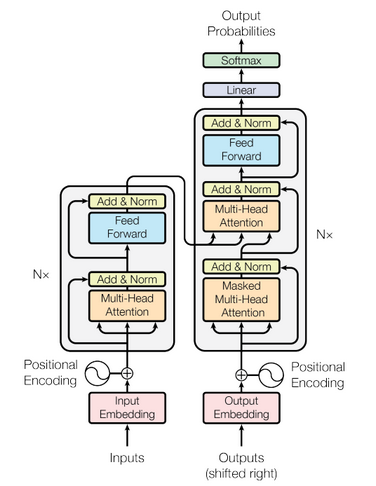

### A High-Level Look

Let’s begin by looking at the model as a single black box. In a machine translation application, it would take a sentence in one language, and output its translation in another.

<img src="https://jalammar.github.io/images/t/the_transformer_3.png" width="60%">

Popping open that Optimus Prime goodness, we see an encoding component, a decoding component, and connections between them.

<img src="https://jalammar.github.io/images/t/The_transformer_encoders_decoders.png" width="60%">

The encoding component is a stack of encoders (the paper stacks six of them on top of each other – there’s nothing magical about the number six, one can definitely experiment with other arrangements). The decoding component is a stack of decoders of the same number.

<img src="https://jalammar.github.io/images/t/The_transformer_encoder_decoder_stack.png" width="60%">

The encoders are all identical in structure (yet they do not share weights). Each one is broken down into two sub-layers:

<img src="https://jalammar.github.io/images/t/Transformer_encoder.png" width="60%">

The encoder’s inputs first flow through a **self-attention layer** – a layer that helps the encoder look at other words in the input sentence as it encodes a specific word. We’ll look closer at self-attention later in the post.

The outputs of the self-attention layer are fed to a feed-forward neural network. The exact same feed-forward network is independently applied to each position.

The decoder has both those layers, but between them is an attention layer that helps the decoder focus on relevant parts of the input sentence (similar what attention does in seq2seq models).

<img src="https://jalammar.github.io/images/t/Transformer_decoder.png" width="60%">

## Job?

<img src="https://miro.medium.com/max/3092/1*Nm8pVfLjApaGw54-VFUTxg.png" width="80%">

# From words to Vectors

<img src="https://miro.medium.com/max/1070/1*PPp8BYDRd380rgrWDP42_g.png" width="70%">

- **Tokenization** is the task of chopping it up into pieces, called tokens , perhaps at the same time throwing away certain characters, such as punctuation.
- Using **wordpieces**(e.g. playing -> play + ##ing) instead of words. This is effective in reducing the size of the vocabulary and increases the amount of data that is available for each word.
- **Numericalization** aims at mapping each token to a unique integer in the corpus’ vocabulary.
- **Token embedding** is the task of get the embedding (i.e. a vector of real numbers) for each word in the sequence. Each word of the sequence is mapped to a emb_dim dimensional vector that the model will learn during training. You can think about it as a vector look-up for each token. The elements of those vectors are treated as model parameters and are optimized with back-propagation just like any other weights.
- **Padding** was used to make the input sequences in a batch have the same length. That is, we increase the length of some of the sequences by adding 'pad' tokens.
- **Positional encoding**:

Recall that the **positional encoding** is designed to help the model learn some notion of **sequences and relative positioning of tokens**. This is crucial for language-based tasks especially here because we are not making use of any traditional recurrent units such as RNN, GRU or LSTM

Intuitively, we aim to be able to **modify the represented meaning of a specific word depending on its position**. We don’t want to change the full representation of the word but we want to **modify it a little to encode its position** by adding numbers between [-1,1] using predetermined (non-learned) sinusoidal functions to the token embeddings. For the rest of the **Encoder**, the word will be **represented slightly differently depending on the position the word is in** (even if it is the same word).

**Encoder** must be able to use the fact that **some words are in a given position** while, in the same sequence, other words are in other specific positions. That is, we want the network to able to **understand relative positions** and **not only absolute ones.**

<img src="https://miro.medium.com/max/3248/1*OsmkGAkon5IDTwZJ1ORwPA.png" width="80%">
The sinuosidal functions chosen by the authors allow positions to be represented as linear combinations of each other and thus allow the network to learn relative relationships between the token positions.

<img src="https://miro.medium.com/max/2980/1*9DD12JPwj1pLY6yUEOv35A.png" width="80%">

<img src="https://miro.medium.com/max/2980/1*Y1MDr4WgzYp4eZaBOuJIYw.png" width="80%">

**Positional embeddings** could be understood as the **distance between different words in the sequence**. The intuition here is that adding these values to the embeddings provides **meaningful distances between the embedding vectors once they’re projected into Q/K/V vectors and during dot-product attention.**

<img src="https://miro.medium.com/max/3228/1*Q2MAvQ4CuhyPaXBDuNyEKg.png" width="80%">

# Encoder Blocks

<img src="https://miro.medium.com/max/1824/1*6j1Fn5sI12Qnv-pL9M57ZQ.png" width="60%">
A total of N encoder blocks are chained together to generate the **Encoder’s** output.

Note: In BERT’s experiments, the number of blocks N (or L, as they call it) was chosen to be 12 and 24.

- The dimensions of the **input** and **output** of the encoder block are the same. Hence, it makes sense to **use the output of one encoder block as the input of the next encoder block**.
- A specific block is in charge of **finding relationships between the input representations and encode them** in its output.
- The blocks do not share weights with each other.
- This iterative process through the blocks will help the neural network capture more complex relationships between words in the input sequence.
- The **Transformer** uses **Multi-Head Attention**, which means it computes attention **h different times** with **different weight matrices** and then concatenates the results together.


<img src="https://miro.medium.com/max/2830/0*FHV50Xi3zCD4_76k.png" width="80%">

## Attention Mechanism

Let’s dive into attention mechanism. Note that Multi Head Self Attention is different between **ENCODER block** and **DECODER block**.

<img src="https://miro.medium.com/max/3216/1*RAOLaGJ5gBEWUmTjPXmA4Q.png" width="80%">

## A - One Head Self-Attention

A **RNN** maintains a hidden state allows it to incorporate its representation of previous words/vectors it has processed with the current one it’s processing. **Self-attention** is the method the Transformer uses to bake the “understanding” of other relevant words into the one we’re currently processing.

![](https://miro.medium.com/max/3076/1*vBhpTGfzaOTAG5iIAHTcxg.png)

What does “it” in this sentence refer to? Is it referring to the street or to the animal?

- Create **three vectors** from each of the **encoder’s input vectors**
- For **each word**, we create **a Query vector, a Key vector, and a Value vector
- These vectors are created by **multiplying the embedding** by **three matrices** that we trained during the training process.

Notice that **these new vectors** are **smaller in dimension than the embedding vector**. Their dimensionality is 64, while the embedding and encoder input/output vectors have dimensionality of 512.

Why **dimensionality is 64?** As we must have :

-> Output’s dimension is [length of input sequences] x [dimension of embeddings — 512]

-> We use 8 heads during Multi-head Self-Attention process. The output size of a given self attention vector is [length of input sequences] x [64]. So the concatenated vector resulting from all Multi-head Self-Attention process would be [length of input sequences] x ([64] x [8]) = [length of input sequences] x ([512])

![](https://miro.medium.com/max/2616/1*ic6fUK2W86NL0igIjHAPZQ.png)

**Query q**: the query vector q encodes the word/position on the left that is paying attention, i.e. the one that is “querying” the other words. In the example above, the query vector for “the” (the selected word) is highlighted.

**Key k**: the key vector k encodes the word on the right to which attention is being paid. The key vector together with the query vector determine the attention score between the respective words, as described below.

**q×k (element-wise)**: the element-wise product of the query vector and a key vector. This product is computed between the selected query vector and each of the key vectors. This is a precursor to the dot product (the sum of the element-wise product) and is included for visualization purposes because it shows how individual elements in the query and key vectors contribute to the dot product.

**q·k**: the dot product of the selected query vector and each of the keyvectors. This is the unnormalized attention score.

**Softmax**: the softmax of q·k / 8 across all target words. This normalizes the attention scores to be positive and sum to one. The constant factor 8 is the square root of the vector length (64). This softmax score determines how much each word will be expressed at this position. Clearly the word at this position will have the highest softmax score, but sometimes it’s useful to attend to another word that is relevant to the current word.
How to calculate these three vectors?

![](https://miro.medium.com/max/2652/1*5rKwra-kv9DUpwGbZ-NYVA.png)

We calculate self-attention for every word in the input sequence.

<img src="https://miro.medium.com/max/2136/1*etLG-EqfKl5GcPxne9IQBQ.png" width="80%">

## Focus on "Score"

*[Q x Transpose of K] is a product scalar between **Query vector** and **Key Vector**. The closer the **Key Vector** is than the Query Vector, the higher the score — resulting from [Q x Transpose of K]- would be.*

*Softmax will provide us a probability distribution which keeps increasing the value for key vectors which are similar to respective query vectors and consequently keep decreasing key vectors which are far away from query vector.*

- **d_k** and **d_v** are set such that d_k = d_v = emb_dim/h.

Remember that **Q** and **K** were different projections of the tokens into a **d_k (i.e. 64) dimensional space**. Therefore, we can think about **the dot product of those projections as a measure of similarity between tokens projections**. For every vector projected through Q the dot product with the projections through K measures the similarity between those vectors. If we call v_i and u_j the projections of the i-th token and the j-th token through Q and K respectively, their dot product can be seen as:

![](https://miro.medium.com/max/414/1*aGrtfwdGBG3D5SCbnB-XlA.png)

This is a measure of **how similar are the directions of u_i and v_j** and **how large are their lengths** (the closest the direction and the larger the length, the greater the dot product).

Another way of thinking about this matrix product is as the encoding of a **specific relationship between each of the tokens in the input sequence**(the relationship is defined by the matrices K, Q).
![](https://miro.medium.com/max/2418/0*XoCOJ5GzlqIa62LG.png)

![](https://miro.medium.com/max/4104/1*se1wlg03TiR3bYnyI8q9PA.png)
(https://towardsdatascience.com/deconstructing-bert-part-2-visualizing-the-inner-workings-of-attention-60a16d86b5c1)


We see that the **product of the query vector** for “the” and **the key vector** for “store” (the next word) is strongly positive across most neurons. For tokens other than the next token, the **key-query product contains some combination of positive and negative values**. The result is a high attention score between “the” and “store”.

<img src="https://miro.medium.com/max/2568/1*2aZiyXVnZTVgAWxvWMjzyQ.png" width="80%">

**Example**: Consider this phrase — “Action gets results”. To calculate the self-attention for the first word “Action”, we will **calculate scores for all the words in the phrase with respect to “Action”. This score determines the importance of other words when we are encoding a certain word in an input sequence.


<img src="https://miro.medium.com/max/3336/1*yw2PxgzsjNNKE-UaVoZESQ.png" width="80%">


<img src="https://miro.medium.com/max/2976/1*R9NE3rNKGO1ThN2jhZYBRg.png" width="80%">

Let's go back with our initial example:


<img src="https://miro.medium.com/max/1648/1*tbb9rywOeo3kBtJ85ZdPFA.png" width="80%">


<img src="https://miro.medium.com/max/1648/1*mllxBXok93AsQ_m43D3v_g.png" width="80%">

To sum up when it comes to One-Head Self Attention

The main idea behind attention is **lookup-table**, a table that has a large number of values for some other values and **you ask it a query** and **it returns one closest to it**. In the method used here, we feed it three values, key, value and query. There are large number of keys, basically 1-dimensional vectors in n-dimensional space, where each key has some corresponding value.


<img src="https://miro.medium.com/max/1989/1*yA0mAyNVnbSSR7vFZb87ow.png" width="60%">

<img src="https://miro.medium.com/max/666/1*AsRQcLJ1y7U0wVdj75Vpzw.png" width="60%">

<img src="https://miro.medium.com/max/1112/1*9grAnDs4hhtwPtx3axbC_Q.png" width="60%">

## B-Muti-Head Self-Attention

The paper notes that **“additive attention”** performs better than the self attention described above, though it is much slower. Additive attention uses a more complicated compatibility function — namely a feed forward neural network.

Self-attention is computed not once but multiple times in the Transformer’s architecture, in parallel and independently. It is therefore referred to as Multi-head Attention. The outputs are concatenated and linearly transformed as shown in the figure below:

![](https://miro.medium.com/max/240/0*JVR9ZEXkq3LH5_c_.png)

The Transformer uses **eight attention heads**, so we end up with **eight sets for each encoder/decoder**. Each set is used to **project the input embeddings into a different representation subspace**. If we do the same self-attention calculation we described just above, we end up with eight different Z matrices.

However, **the feed-forward layer is not expecting eight matrices**. We need to concatenate them and condense these eight down into a single matrix by multiply them with an additional weights matrix WO

How to return 8 matrices Z1…Z8 into a singe matrix Z in Multi-head attention?

![](https://miro.medium.com/max/1384/1*APB6M-aibDcXSBNxF3A6dQ.png)



To sum up...

<img src="https://miro.medium.com/max/1668/1*WWMs-xd5zUiLB6n6haoETQ.png" width="80%">

Here is the result :
<img src="https://miro.medium.com/max/1438/1*9Fe9bexZEzVesIKRL2V4hQ.gif" width="80%">

# Dropout, Add & Norm

https://web.stanford.edu/class/archive/cs/cs224n/cs224n.1184/lectures/lecture12.pdf

Before this layer, there is always a layer for which inputs and outputs have the same dimensions (*Multi-Head Attention or Feed-Forward*). We will call that layer *Sublayer* and its input x.

After each *Sublayer*, dropout is applied with 10% probability. Call this result *Dropout(Sublayer(x))*. This result is added to the Sublayer’s input x, and we get x + *Dropout(Sublayer(x))*.


<img src="https://miro.medium.com/max/666/0*e_3Pv_3pT5O4WHJb.png" width="50%">

Observe that in the context of a *Multi-Head Attention* layer, this means **adding the original representation of a token x to the representation based on the relationship with other tokens**. It is like telling the token:

**“Learn the relationship with the rest of the tokens, but don’t forget what we already learned about yourself!”**

Finally, a token-wise/row-wise normalization is computed with the mean and standard deviation of each row. This improves the stability of the network.


<img src="https://miro.medium.com/max/712/0*k9KOvRpb3Lk-58W4.png" width="50%">


<img src="https://miro.medium.com/max/1766/1*udWf0jTd3DyrNMvzOafs0Q.png" width="60%">

We compute **the mean and variance used for normalization** from all of the summed inputs to the neurons in a layer on a single training case.

# Position-wise-Feed-Forward Network

In addition to attention sub-layers, each of the layers in our encoder and decoder contains **a fully connected feed-forward network**, which is applied to each position separately and identically. This consists of two linear transformations with a ReLU activation in between.

![](https://miro.medium.com/proxy/1*y2lQq8XHC0E373OxwIM6Ow.png)
(https://mc.ai/seq2seq-pay-attention-to-self-attention-part-2/)

While the linear transformations are the same across different positions, they use different parameters from layer to layer. Another way of describing this is as two convolutions with kernel size 1. The dimensionality of input and output is dmodel=512, and the inner-layer has dimensionality dff=2048.


# 3. Decoder Block

Each **decoder layer** consists of sublayers:

1. Masked multi-head attention (with **look ahead mask and padding mask**)
2. Multi-head attention (with padding mask). **V (value) and K (key) receive the encoder output as inputs. Q (query) receives the output from *the masked multi-head attention sublayer.**
3. Point wise feed forward networks

Each of these sublayers has a residual connection around it followed by a layer normalization. The output of each sublayer is LayerNorm(x + Sublayer(x)).

There are N decoder layers in the transformer.

As **Q** receives **the output from decoder’s first attention block**, and **K** receives the **encoder output**, **the attention weights represent the importance given to the decoder’s input based on the encoder’s output**. In other words, **the decoder predicts the next word by looking at the encoder output and self-attending to its own output**.

## Multi Head Masked Self Attention

In *encoder*, self-attention layers process input **queries, keys and values** that comes from the **output of previous layer**. Each position in encoder can attend to all positions from previous layer of the encoder.

In *decoder*, self-attention layer enable **each position to attend to all previous positions in the decoder**, including the current position.

![](https://miro.medium.com/max/338/1*sgJkbZyociQQnDmSmkdk0Q.png)
(https://persagen.com/resources/biokdd-review-nlu.html)

![](https://miro.medium.com/max/507/1*4olcOVVPJp0648VVuD-HGg.png)

In other words, the self-attention layer is only allowed to attend to **earlier positions in the output sequence**. Masking multi-head attention is done by masking future positions (setting them to -∞) before the softmax step in the self-attention calculation. **This step ensures that the predictions for position i can depend only on the known outputs at positions less than *i*. Since we want these elements to be zero after the softmax, we set them to −∞.

![](https://miro.medium.com/max/451/1*lJvMNS3bpOSsvohmJkgx3w.png)

With RNNs — there is no issue like that, since **they cannot look forward into the input sequence: output i depends only on inputs 0 to i**. With a transformer, the output depends on the entire input sequence, so prediction of the next words/characters becomes vacuously easy, just retrieve it from the input.

To use self-attention as an autoregressive model, we’ll need to ensure that it **cannot look forward into the sequence**. We do this by **applying a mask to the matrix of dot products**, before the softmax is applied. **This mask disables all elements above the diagonal of the matrix**.

After we’ve **handicapped the self-attention module like this**, the model **can no longer look forward in the sequence**.

The “**Decoder Attention**” layer works just like multiheaded self-attention, except it creates its **Queries matrix** from the **layer below it**, and **takes the Keys and Values matrix from the output of the encoder stack**.

![](https://miro.medium.com/max/1342/0*35MlGUV6krab7BSZ.png)
![](https://miro.medium.com/max/684/1*e-zIdj7U1IKzy2ttj_Zd-g.png)

Self-attention layers in the decoder allow **each position in the decoder to attend to all positions in the decoder up to and including that position**. We need to prevent **leftward information flow** in the decoder to preserve the **auto-regressive property**. We implement this inside of scaled dot- product attention by masking out (setting to −∞) **all values in the input of the softmax which correspond to illegal connections.

# 4. The Final Linear and Softmax Layer

The decoder stack outputs **a vector of floats. How do we turn that into a word?** That’s the job of the final Linear layer which is followed by a Softmax Layer.

**The Linear layer is a simple fully connected neural network that projects the vector produced by the stack of decoders, into a much, much larger vector called a logits vector**. *This space is the size of vocabulary (all words). We just project the matrix of weights (provided by the decoder block) into a “vocabulary space”.

Mathematically speaking, what does it mean?

Let’s assume that our model knows 10,000 unique English words (our model’s “output vocabulary”) that it’s learned from its training dataset. This would **make the logits vector 10,000 cells wide — each cell corresponding to the score of a unique word**. That is how we interpret the output of the model followed by the Linear layer.

The **softmax layer** then **turns those scores into probabilities** (all positive, all add up to 1.0). **The cell with the highest probability is chosen, and the word associated with it is produced as the output for this time step.** Softmax provides us **the most likely word to predict** (we take the word of the column which give us the highest probability).

![](https://miro.medium.com/max/869/0*YJ6y9N3jvQQHbjxl.png)

This figure starts from the bottom with the vector produced as the output of the decoder stack. It is then turned into an output word.

# 5. Residual Connection

A residual connection is basically just taking the input and adding it to the output of the sub-network, making training deep networks easier in the field of computer vision. Layer normalization is a normalization method in deep learning that is similar to batch normalization. In layer normalization, the statistics are computed across each feature and are **independent of other examples**. The independence between inputs means that each input has a different normalization operation.

![](https://miro.medium.com/proxy/1*z-jPITfcAcgijEMaizhrZw.png)

# 7. Model Training - How BERT is trained?

## BERT

BERT is basically a trained Transformer Encoder stack. 

<img src="http://jalammar.github.io/images/bert-transfer-learning.png" width="60%">

<img src="http://jalammar.github.io/images/bert-base-bert-large-encoders.png" width="60%">

Both BERT model sizes have a large number of encoder layers (which the paper calls Transformer Blocks) – twelve for the Base version, and twenty four for the Large version. These also have larger feedforward-networks **(768 and 1024 hidden units respectively)**, and more attention heads **(12 and 16 respectively)** than the default configuration in the reference implementation of the Transformer in the initial paper **(6 encoder layers, 512 hidden units, and 8 attention heads).**


### Model Inputs

<img src="http://jalammar.github.io/images/bert-input-output.png" width="60%">

The first input token is supplied with a special [CLS] token for reasons that will become apparent later on. CLS here stands for Classification.

Just like the vanilla encoder of the transformer, BERT takes a sequence of words as input which keep flowing up the stack. Each layer applies self-attention, and passes its results through a feed-forward network, and then hands it off to the next encoder.


<img src="http://jalammar.github.io/images/bert-encoders-input.png" width="60%">
In terms of architecture, this has been identical to the Transformer up until this point (aside from size, which are just configurations we can set). It is at the output that we first start seeing how things diverge.

### Model Outputs

Each position outputs a vector of size hidden_size (768 in BERT Base). For the sentence classification example we’ve looked at above, we focus on the output of only the first position (that we passed the special [CLS] token to).
<img src="http://jalammar.github.io/images/bert-output-vector.png" width="60%">
That vector can now be used as the input for a classifier of our choosing. The paper achieves great results by just using a single-layer neural network as the classifier.

<img src="http://jalammar.github.io/images/bert-classifier.png" width="60%">
If you have more labels (for example if you’re an email service that tags emails with “spam”, “not spam”, “social”, and “promotion”), you just tweak the classifier network to have more output neurons that then pass through softmax.


### Improvements
![](https://miro.medium.com/max/1234/1*KbAUVetHPMreJdcbicmJrw.png)

1. Differences between GPT vs. ELMo vs. BERT -> all pre-training model architectures. BERT uses a bidirectional Transformer vs. GPT uses a left-to-right Transformer vs. ELMo uses the concatenation of independently trained left-to-right and right-to-left LSTM to generate features for downstream task. BERT representations are jointly conditioned on both left and right context in all layers. In other words, it is deeply bidirectional, as opposed to ELMo (shallow bidirectional) and OpenAI GPT (one direction, left to right).
2. Transformers demonstrate that recurrence and convolution are not essential for building high-performance natural language models
3. They achieve state-of-the-art machine translation results using a self-attention operation
4. Attention is a highly-efficient operation due to its parallelizability and runtime characteristics
5. Traditional language models take the previous n tokens and predict the next one. In contrast, BERT trains a language model that takes both the previous and next tokens into account when predicting- really bidirectional.
6. If you simply ask a deep neural network to learn what typical English sentences look like by reading all of Wikipedia, what does it learn about the English language? BERT encode human-like parse trees and find tree structures in these vector spaces when computer have represented each word in the sentence as a real-valued vector, with no explicit representation of the parse tree. BERT has the ability to reconstruct parse trees from the Penn Treebank.

<img src="https://miro.medium.com/max/1984/0*1GqiGkk0LW6hMLsA.png" width="60%">
- Scoring the importance of each layer for a specific NLP task (e.g. POS, NER etc.), shows basic syntactic information is captured earlier (lower layers) in the network followed by semantic information in higher layers. This reflected in the image on the right. (This observation is similar to what was seen in ELMo model too).
- Also, information related to syntactic tasks seems to be more localized in few layers, where information for semantic tasks (SPR and Relations) is generally spread across the entire network
- Examining the output word vectors show not only are different senses of a word captured in distinct representations they are also spatially separated in a fine grained manner.



7. **Distance each word has to travel**: In a simple RNN, the word ‘Echt’ has to travel multiple steps. The last red layer has to store the encoded information. In large sentences which are over 50 words long, **the amount of distance each word has to travel increases linearly.** And since we keep writing over that encoded information, we are sure to loose important words that come early in the sentence. After encoding it also h as to travel to get to it’s decoded destination.

<img src="https://miro.medium.com/max/1000/1*kl2ldmXEFCxVtvDVsDePug.png" width="60%">

With an **attention mechanism** we no longer try encode the full source sentence **into a fixed-length vector.** Rather, we allow the decoder to “attend” to different parts of the source sentence at each step of the output generation.

The significant achievement of attention mechanism was to improve **spatial understanding of the model.**




## A - Masked Language Modeling (MLM)

*“The masked language model randomly masks some of the tokens from the input, and the objective is to **predict the original vocabulary id of the masked word based only on its context**. Unlike **left-to-right language model pre-training**, the MLM objective allows the representation to fuse the left and the right context, which allows us to pre-train **a deep bidirectional Transformer.”*

The Google AI researchers masked **15% of the words in each sequence at random.** The task? To predict these masked words. A caveat here — the masked words were not always replaced by the masked tokens [MASK] because the [MASK] token would never appear during fine-tuning.

So, the researchers used the below technique:
- 80% of the time the words were replaced with the masked token [MASK]
- 10% of the time the words were replaced with random words
- 10% of the time the words were left unchanged

<img src="https://miro.medium.com/max/1600/0*7n-KcrsCy3WrrmUb" width="60%">

## B- Next Sentence Prediction

Generally, language models do not capture the relationship between consecutive sentences. BERT was pre-trained on this task as well.

For language model pre-training, BERT uses pairs of sentences as its training data. The selection of sentences for each pair is quite interesting. Let’s try to understand it with the help of an example.

Imagine we have a text dataset of 100,000 sentences and we want to pre-train a BERT language model using this dataset. So, there will be 50,000 training examples or pairs of sentences as the training data.

- For 50% of the pairs, the second sentence would actually be the next sentence to the first sentence
- For the remaining 50% of the pairs, the second sentence would be a random sentence from the corpus
- The labels for the first case would be ‘IsNext’ and ‘NotNext’ for the second case

# 8. Pre-trained Models


<img src="https://ars.els-cdn.com/content/image/1-s2.0-S2666651021000231-gr9.jpg" width="80%">

